# U.S. Medical Insurance Costs

In [1]:
# Import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in csv
file = "insurance.csv"
file_df = pd.read_csv(file)

file_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check datatypes
file_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
# Make lists of fields
age = file_df["age"].tolist()
sex = file_df["sex"].tolist()
bmi = file_df["bmi"].tolist()
children = file_df["children"].tolist()
smoker = file_df["smoker"].tolist()
region = file_df["region"].tolist()
charges = file_df["charges"].tolist()

In [5]:
record = []
i = 0
while i < len(age):
    record.append(i+1)
    i += 1

# Create dictionary of all patient records
medical_records = {}
for record in record:
    medical_records[record] = {"Age":age[record-1], "Sex":sex[record-1], "BMI":bmi[record-1], "Children":children[record-1], 
                               "Smoker":smoker[record-1], "Region":region[record-1], "Charges":charges[record-1]}

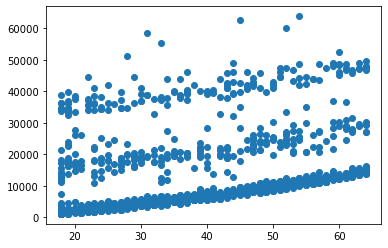

In [6]:
# Check for relationship between age and charges
plt.scatter(age, charges)
plt.show()

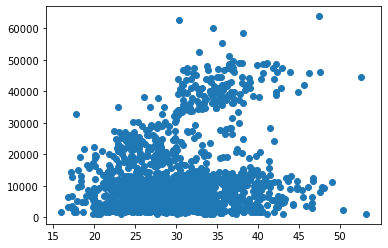

In [7]:
# Check for relationship between bmi and charges
plt.scatter(bmi, charges)
plt.show()

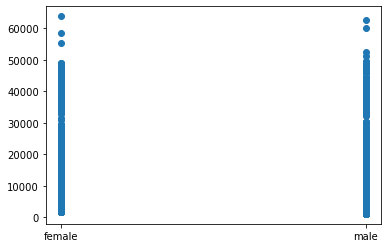

In [8]:
# Check for relationship between sex and charges
plt.scatter(sex, charges)
plt.show()

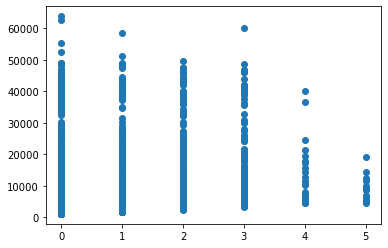

In [9]:
# Check for relationship between number of children and charges
plt.scatter(children, charges)
plt.show()

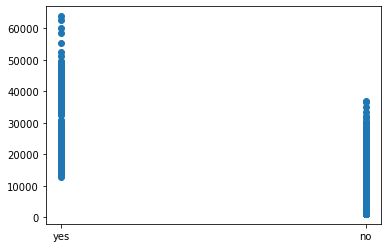

In [10]:
# Check for relationship between smoking and charges
plt.scatter(smoker, charges)
plt.show()

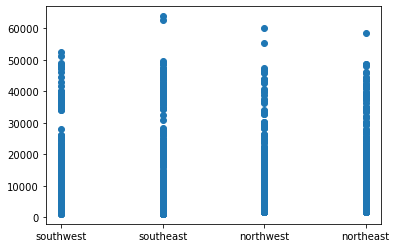

In [11]:
# Check for relationship between region and charges
plt.scatter(region, charges)
plt.show()

In [12]:
# Function to convert numbers to range buckets
def num_to_range(dictionary, list_field):
    for record in dictionary:
        if dictionary[record][list_field] < 10:
            dictionary[record][list_field] = "0-9"
        elif dictionary[record][list_field] < 20:
            dictionary[record][list_field] = "10-19"
        elif dictionary[record][list_field] < 30:
            dictionary[record][list_field] = "20-29"
        elif dictionary[record][list_field] < 40:
            dictionary[record][list_field] = "30-39"
        elif dictionary[record][list_field] < 50:
            dictionary[record][list_field] = "40-49"
        elif dictionary[record][list_field] < 60:
            dictionary[record][list_field] = "50-59"
        elif dictionary[record][list_field] < 70:
            dictionary[record][list_field] = "60-69"
        elif dictionary[record][list_field] < 80:
            dictionary[record][list_field] = "70-79"
        elif dictionary[record][list_field] < 90:
            dictionary[record][list_field] = "80-89"
        elif dictionary[record][list_field] < 100:
            dictionary[record][list_field] = "90-99"
        else:
            dictionary[record][list_field] = "100+"

In [13]:
num_to_range(medical_records, "Age")
num_to_range(medical_records, "BMI")

In [14]:
# Make function to generate unique lists
def unique_list(dictionary, list_field):
    list = []
    for item in dictionary:
        if dictionary[item][list_field] not in list:
            list.append(dictionary[item][list_field])
    return list
            
age_list = unique_list(medical_records, "Age")
bmi_list = unique_list(medical_records, "BMI")
sex_list = unique_list(medical_records, "Sex")
num_children_list = unique_list(medical_records, "Children")
smoker_list = unique_list(medical_records, "Smoker")
region_list = unique_list(medical_records, "Region")

In [15]:
# Make function to find average costs
def find_avg_cost(dictionary, entry_list, list_field):
    cost_dictionary = {}
    for item in entry_list:
        total_cost = 0
        num_records = 0
        for record in dictionary:
            if dictionary[record][list_field] == item:
                total_cost += dictionary[record]["Charges"]
                num_records += 1
        average_cost = total_cost/num_records
        cost_dictionary[item] = round(average_cost,2)
    return cost_dictionary

In [16]:
age_avg_cost = find_avg_cost(medical_records, age_list, "Age")
bmi_avg_cost = find_avg_cost(medical_records, bmi_list, "BMI")
sex_avg_cost = find_avg_cost(medical_records, sex_list, "Sex")
num_children_avg_cost = find_avg_cost(medical_records, num_children_list, "Children")
smoker_avg_cost = find_avg_cost(medical_records, smoker_list, "Smoker")
region_avg_cost = find_avg_cost(medical_records, region_list, "Region")

In [17]:
# Make function to plot bar charts of average costs
def bar_chart(dictionary, title):
    x_value = []
    y_value = []
    for item in dictionary.keys():
        x_value.append(item)
    x_value.sort()
    for item in x_value:
        y_value.append(dictionary[item])
    plt.bar(x_value, y_value)
    plt.xlabel(title)
    plt.ylabel("Average Cost")
    plt.title(f"Average Cost by {title}")
    plt.show()

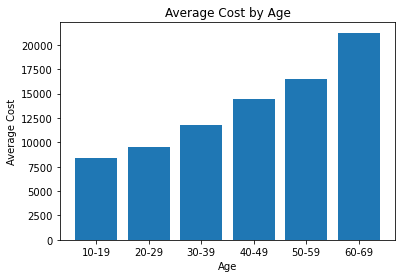

In [18]:
bar_chart(age_avg_cost, "Age")

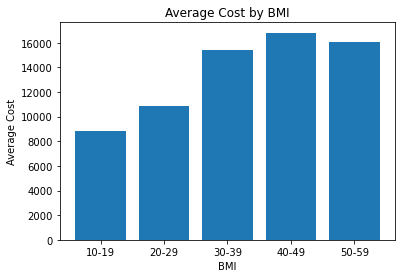

In [19]:
bar_chart(bmi_avg_cost, "BMI")

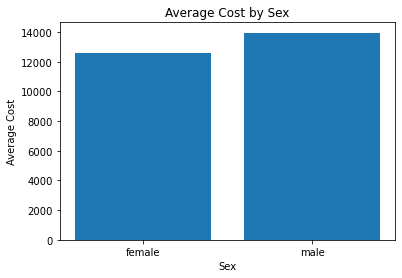

In [20]:
bar_chart(sex_avg_cost, "Sex")

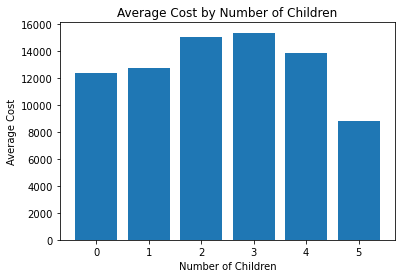

In [21]:
bar_chart(num_children_avg_cost, "Number of Children")

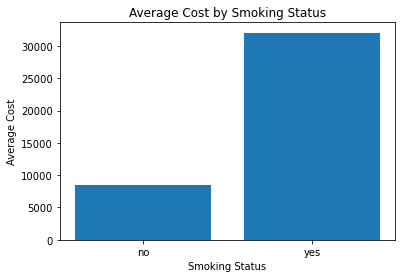

In [22]:
bar_chart(smoker_avg_cost, "Smoking Status")

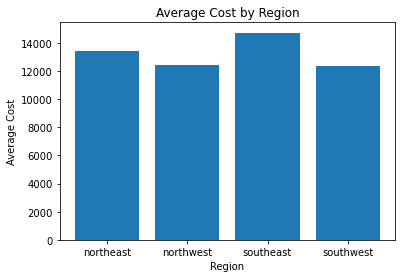

In [23]:
bar_chart(region_avg_cost, "Region")